# Metallicity dependence of the atomic gas cooling function

Figure 10.5 from Chapter 10 of *Interstellar and Intergalactic Medium* by Ryden & Pogge, 2021, 
Cambridge University Press.

Plot of the cooling function for atomic gas in collisional ionization equilibrium (CIE) for a range of
metallicities from subsolar to supersolar. Compare to Figure 5.7 for solar metallicity gas.

The cooling curves are calculated using [ChiantiPy](https://github.com/chianti-atomic/ChiantiPy/) v0.9.5 and the
[CHIANTI atomic database](https://www.chiantidatabase.org/). This computation is very time-consuming
(about 24 hours) so a separate program was used to perform the calcuations. This notebook uses the ASCII data
files created by that program to make the plots.

The cooling function data are in the ASCII multicolumn files in the `Cooling/` folder that accompanies this
notebook.

In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# OS-agnostic path handling

from pathlib import Path

# Suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. Fonts and resolution adopted follow CUP style.

In [2]:
figName = 'Fig10_5'

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# output format and resolution

figFmt = 'png'
dpi = 600

# Graphic dimensions 

plotWidth = dpi*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = textWidth 
hInches = wInches/aspect

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad'] = f'{axisPad}'
plt.rcParams['ytick.major.pad'] = f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Cooling Functions

The cooling function were computed for a range of metallicities with electron density n$_e$=0.004cm$^{-3}$ 
and temperatures from T=10$^{4}$ to 10$^{8}$K.

Data are in a mulicolumn ASCII column-oriented file with $\log_{10}$(T) computed from 4.0 to 8.0 in 
logarithmic steps of 0.01dex, and the total cooling in column 2. There are additional columns in these
files we don't use with this notebook that break out the total continuum cooling and then break down
that continuum cooling into free-free, bound-free, and 2-photon contributions.

Metallicities range from 0.001 to 10x solar in semi-logarithmic steps.  We plot a subset of the metallicities
here for clarity.

Filenames are `Cooling/cooling_zXX.txt`, where `XX` is the metallicity in solar units.

In [3]:
metallicities = ['0.001','0.01','0.05','0.1','0.5','1','5','10']

# load the logT and total cooling into dictionaries keyed by the metallicity

Temp = {}
Cool = {}

for z in metallicities:
    coolFile = str(Path("Cooling") / f"cooling_z{z}.txt")

    data = pd.read_csv(coolFile,sep=r'\s+',comment='#')
    Temp[z] = 10.0**np.array(data['logT'])
    Cool[z] = 10.0**np.array(data['Total'])

# Plotting limits

xMin = 1.0e4   # Kelvin
xMax = 1.0e8

yMin = 1.0e-24 # erg cm^3 s^-1
yMax = 1.0e-20

### Make the Plot

Plot the total cooling function for different metallicities, as follows:
 * Solar metallicity is 1.5x thick black line
 * Metallicities of Z=0.001, 0.01, 0.1, and 10 solar are thin solid black lines
 * Metallicities of Z=0.05, 0.5, and 5 solar are thin dotted black lines
 
Label with the metallicity, Z, for each curve

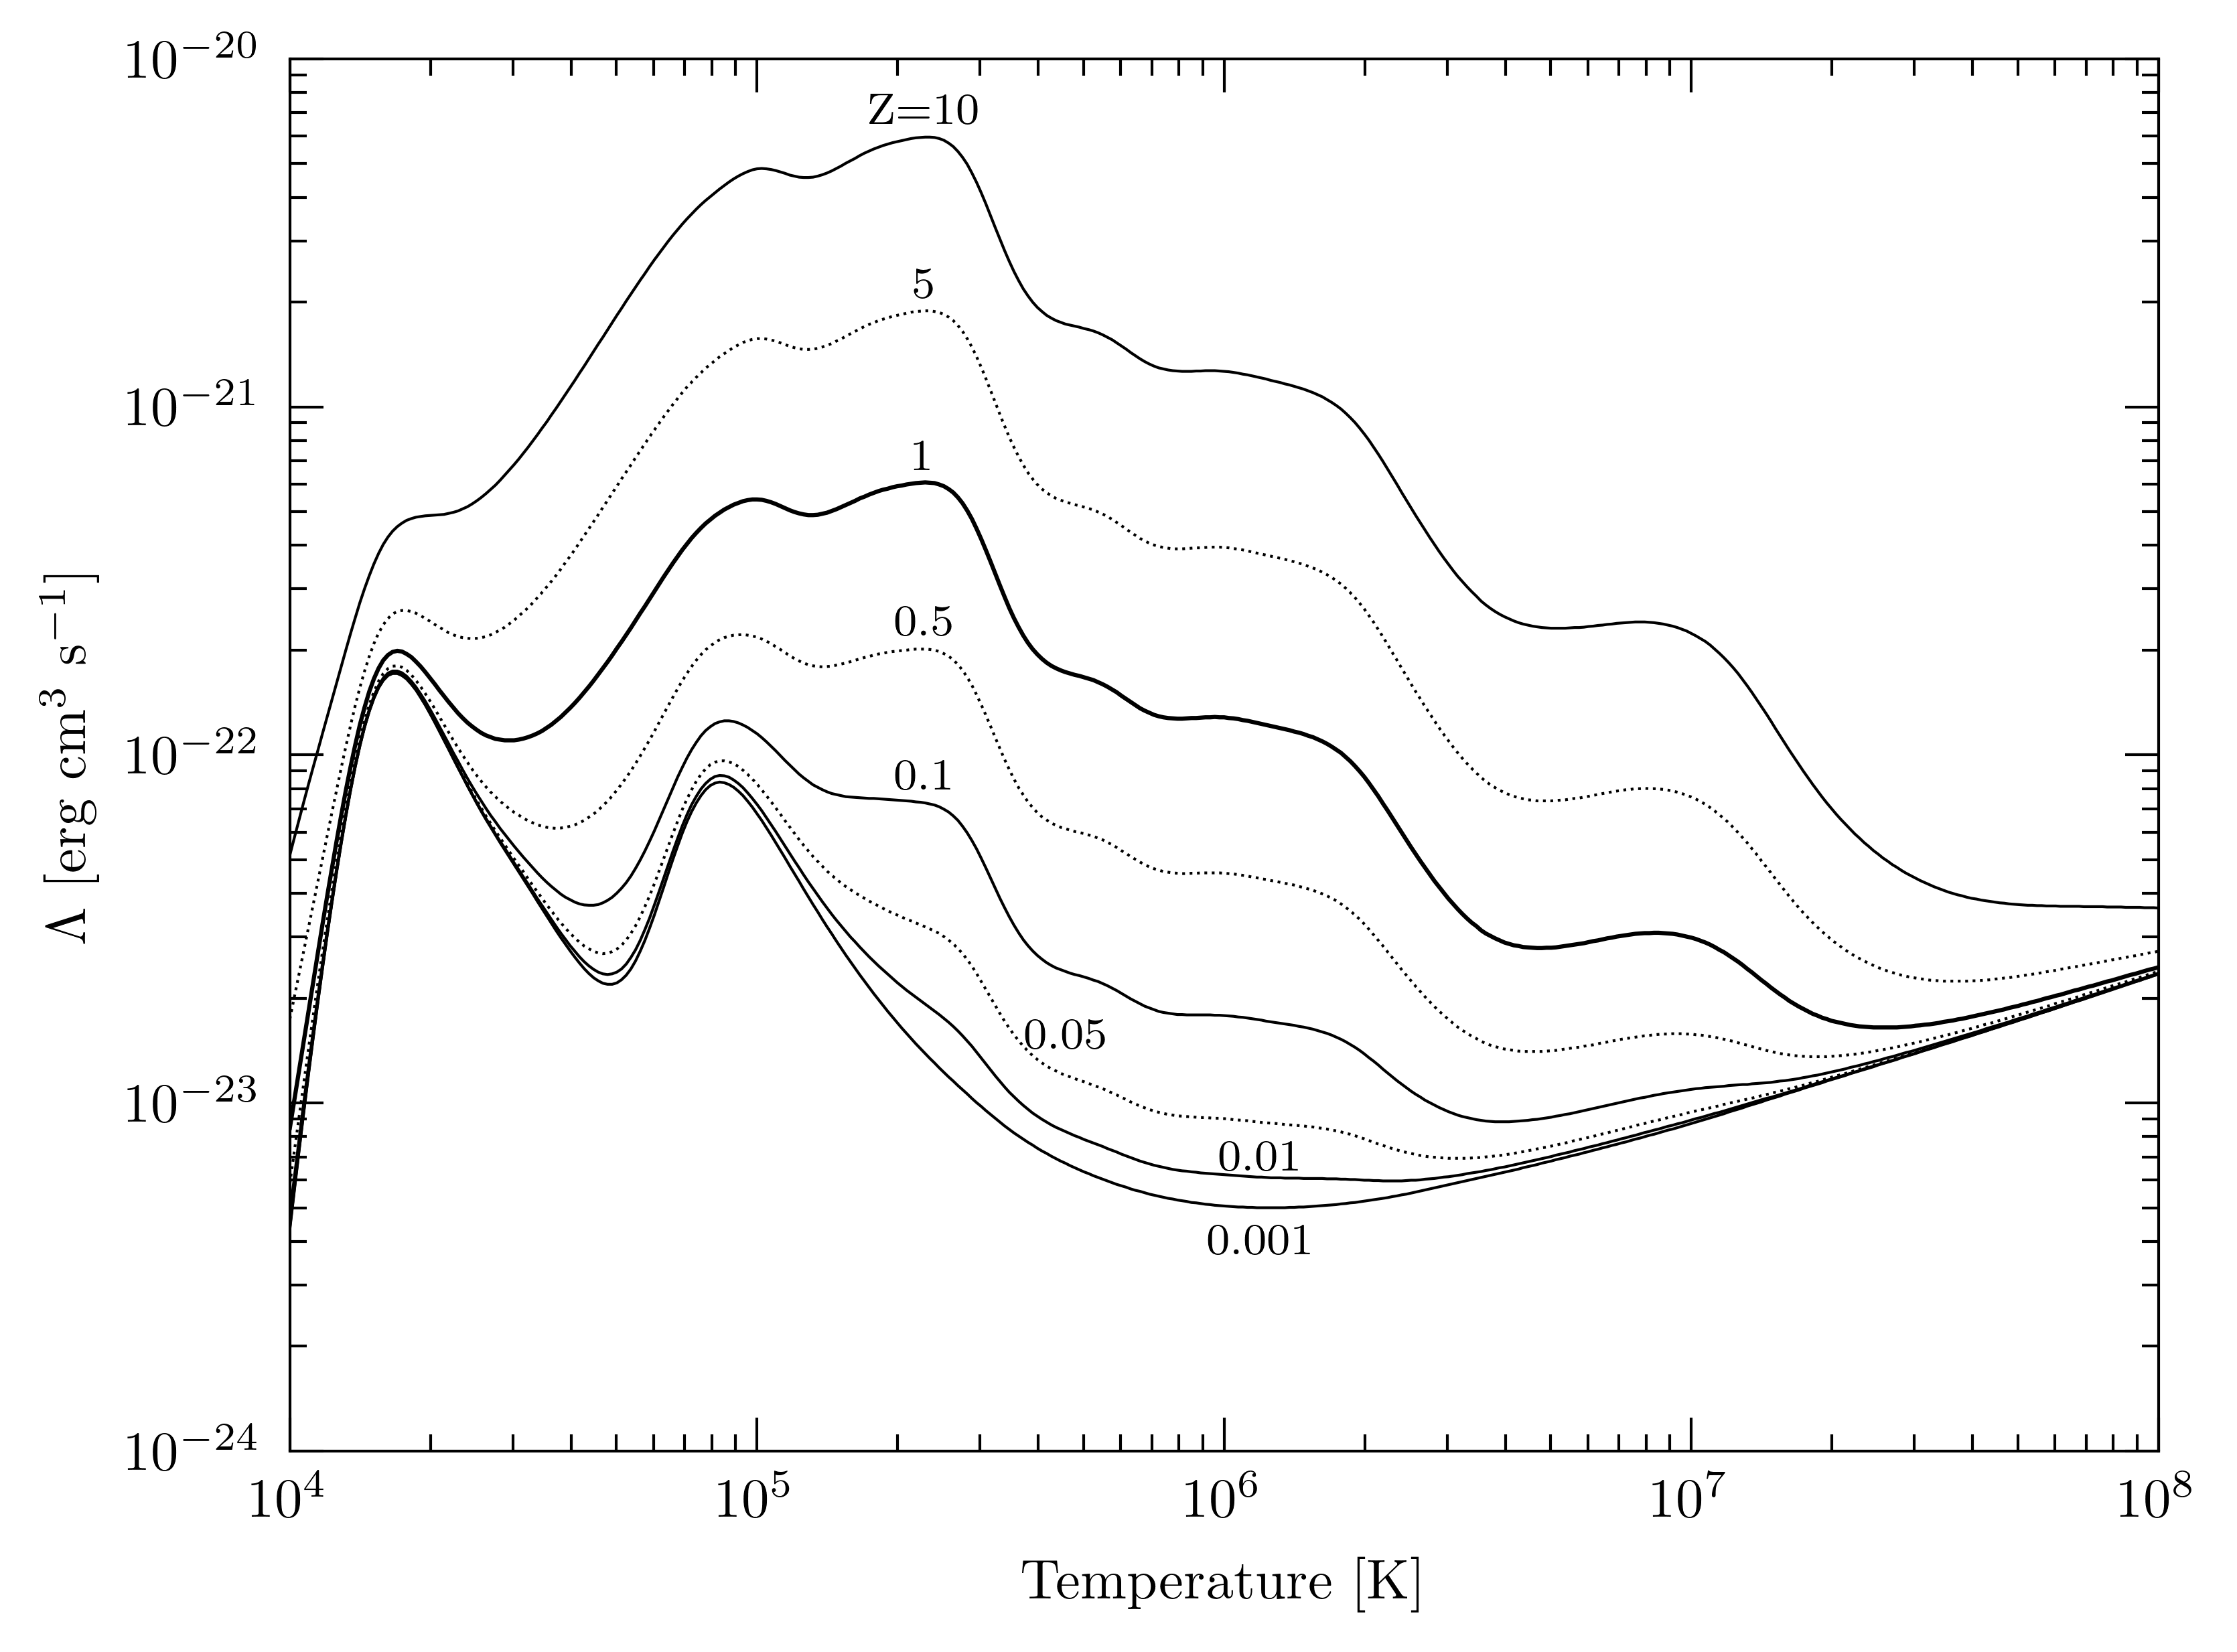

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(xMin,xMax)
ax.set_xscale('log')
ax.set_xlabel(r'Temperature [K]')

ax.set_ylim(yMin,yMax)
ax.set_yscale('log')
ax.set_ylabel(r'$\Lambda$ [erg cm$^3$ s$^{-1}$]',fontsize=axisFontSize)

# Total cooling function

for z in metallicities:
    if z == '1':
        ax.plot(Temp[z],Cool[z],'-',lw=1.5*lwidth,color='black',zorder=10)
    elif '5' in z:
        ax.plot(Temp[z],Cool[z],':',lw=lwidth,color='black',zorder=10)
    elif '1' in z:
        ax.plot(Temp[z],Cool[z],'-',lw=lwidth,color='black',zorder=10)
        
# Annotate

ax.text(229086.765277,6.24938e-22,'1',fontsize=labelFontSize,ha='center',va='bottom',color='black')
ax.text(229086.765277,1.94463e-21,'5',fontsize=labelFontSize,ha='center',va='bottom',color='black')
ax.text(229086.765277,6.13532e-21,'Z=10',fontsize=labelFontSize,ha='center',va='bottom',color='black')
ax.text(229086.765277,2.08474e-22,'0.5',fontsize=labelFontSize,ha='center',va='bottom',color='black')
ax.text(229086.765277,7.5e-23,'0.1',fontsize=labelFontSize,ha='center',va='bottom',color='black')
ax.text(460000,1.35e-23,'0.05',fontsize=labelFontSize,ha='center',va='bottom',color='black')
ax.text(1.2e6,6.05e-24,'0.01',fontsize=labelFontSize,ha='center',va='bottom',color='black')
ax.text(1.2e6,4.5e-24,'0.001',fontsize=labelFontSize,ha='center',va='top',color='black')

# plot and file

plt.savefig(plotFile,bbox_inches='tight',facecolor='white')

plt.show()